#### This Notebook is to create additional features that might be useful for the analysis.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# pd.set_option('display.precision', 0)
pd.options.display.float_format = '{:.2f}'.format


In [9]:
df = pd.read_pickle('../data/processed/processed_cleaned_data.pickle')

In [10]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 26563 entries, 0 to 28058
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     26563 non-null  datetime64[ns]
 1   age_range                     26563 non-null  category      
 2   industry                      26563 non-null  object        
 3   job_title                     26563 non-null  object        
 4   country                       26563 non-null  object        
 5   us_state                      26563 non-null  object        
 6   us_city                       26563 non-null  object        
 7   years_of_experience           26563 non-null  category      
 8   years_of_experience_in_field  26563 non-null  category      
 9   level_of_education            26563 non-null  category      
 10  gender                        26563 non-null  category      
 11  race                          265

,timestamp,age_range,industry,job_title,country,us_state,us_city,years_of_experience,years_of_experience_in_field,level_of_education,gender,race,salary_usd,additional_compensation_usd
0,2021-04-27 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,united states,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,55000.0,0.0
1,2021-04-27 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,united kingdom,N/A,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,74256.0,5440.0
2,2021-04-27 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,united states,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,34000.0,0.0
3,2021-04-27 11:02:41,25-34,Nonprofits,Program Manager,united states,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,62000.0,3000.0
4,2021-04-27 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,united states,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,60000.0,7000.0


#### Feature To Be Created:
- Total Compensation: Combine salary_usd and additional_compensation to create a total_compensation feature.
- Salary Bands: Create salary bands or categories (e.g., low, medium, high)
- Log Salary: Use a logarithmic transformation of salary to handle skewness in salary distribution.
- Convert the years_of_experience and years_of_experience_in_field columns into numerical categories using midpoint
- Calculate the difference between years_of_experience and years_of_experience_in_field to see if people are transitioning into new fields.
- Convert multi-race entries into binary columns (e.g., is_white, is_asian) for easier analysis.
- Create interaction features between gender and level_of_education to study their combined effect on salary.
- Classify cities or states as urban or rural to analyze salary and job title distributions.


**Total Compensation Column** 

In [11]:
df['total_compensation'] = df['salary_usd'] + df['additional_compensation_usd']

**Create Salary Bands**

<Axes: >

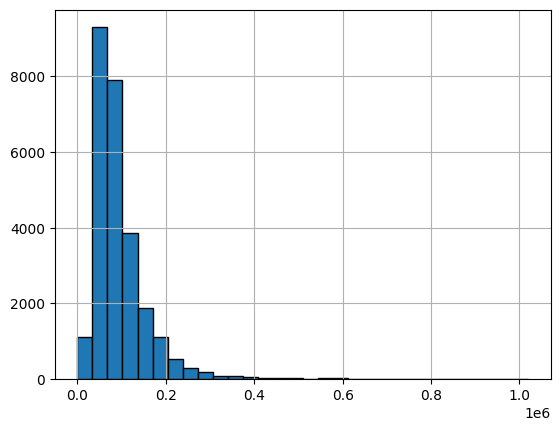

In [13]:
df['total_compensation'].hist(bins=30, edgecolor='black')

In [24]:
df['total_compensation'].mode()

0   70000.00
Name: total_compensation, dtype: float64

In [28]:
bins = [0, 25000, 50000, 75000, 100000,250000,600000, float('inf')]
labels = ['$0-25k', '$25k-50k', '$50k-75k', '$75k-100k', '$100k-250k', '$250k-600k', 'Top 1%']
df['earning_band'] = pd.cut(df['total_compensation'], bins=bins, labels=labels, right=True)

In [29]:
bins = [0, 25000, 65000, 150_000,250000,600000,1_000_000, float('inf')]
labels = ['Very Low', 'Low', 'Middle', 'Upper Middle', 'Upper', 'High Upper', 'High Networth']
df['earning_class'] = pd.cut(df['total_compensation'], bins=bins, labels=labels, right=True)

**Transform Earning into Logarithmic Scale**

In [32]:
# Log Transformation (adding 1 to avoid log(0) issues)
df['log_total_earnings'] = np.log1p(df['total_compensation'])

**Convert Years of Experience and Years of Experience In Field into numerical values using midpoint**

In [61]:
# Function to convert experience ranges to midpoints
import re
def convert_to_midpoint(experience_range):
    # Handle the "41 years or more" and "1 year or less"  edge cases separately
    if 'or' in experience_range:
        num = float(re.findall(r'\d+', experience_range)[0])
        return num 
    
    # Extract numeric values from the range
    # We remove any extra whitespace and split by the "-" or " - "
    bounds = experience_range.replace('years', '').replace(' ', '').split('-')
    
    # Calculate the midpoint
    lower_bound = float(bounds[0])
    upper_bound = float(bounds[1])
    
    midpoint = (lower_bound + upper_bound) / 2
    return midpoint


In [66]:
# Apply the conversion function to the years_of_experience column
df['experience_yrs'] = df['years_of_experience'].apply(convert_to_midpoint)
df['experience_in_field_yrs'] = df['years_of_experience_in_field'].apply(convert_to_midpoint)